In [1]:
# API接続設定のファイルを読み込む
import configparser

# 設定
config = configparser.ConfigParser()
config.read('./config_v1.txt') # パスの指定が必要です
account_ID = config['oanda']['account_id']
api_key = config['oanda']['api_key']

In [3]:
# 必要なモジュールの読み込み
import requests
import json
import pandas as pd
# 口座情報の設定　（口座の開設の仕方はググってね）
API_Token = api_key
API_AccountID = account_ID
# URLの設定　（デモ口座用非ストリーミングURL）
API_URL =  "https://api-fxpractice.oanda.com"
# 通貨ペア
INSTRUMENT = "USD_JPY"
# <ろうそく足取得用URLの変数の設定>
# /v3/instruments/{Account ID}/candles 
url = API_URL + "/v3/instruments/%s/candles?count=5000&price=M&granularity=M1" % INSTRUMENT 
# ヘッダー情報の変数の設定
headers = {"Authorization" : "Bearer " + API_Token}
# サーバーへの要求
response = requests.get(url, headers=headers)
# 処理結果の編集
Response_Body = response.json()
#print(json.dumps(Response_Body, indent=2))
#DataFrameへ変換　  
#list=[]
#for row in Response_Body['candles']:
#    list.append(row['mid'])
#    df = pd.DataFrame(list)
#df = pd.json_normalize(Response_Body['candles'])
df = pd.json_normalize(Response_Body, record_path='candles', meta=['instrument', 'granularity'], sep='_')
df['time_JST'] = pd.to_datetime(df['time']).dt.tz_convert('Asia/Tokyo')
print(df)

KeyError: 'candles'

In [3]:
print(" Open: " + Response_Body["candles"][0]["mid"]["o"]) 
print(" High: " + Response_Body["candles"][0]["mid"]["h"]) 
print("  Low: " + Response_Body["candles"][0]["mid"]["l"]) 
print("Close: " + Response_Body["candles"][0]["mid"]["c"]) 

 Open: 102.928
 High: 102.928
  Low: 102.907
Close: 102.908


In [15]:
url = API_URL + "/v3/instruments/%s/candles?count=2&price=M&granularity=M1&from=1990-05-10T06:00:00.000000000Z"  % (INSTRUMENT)
response = requests.get(url, headers=headers)
Response_Body = response.json()
print(json.dumps(Response_Body, indent=2))

{
  "instrument": "USD_JPY",
  "granularity": "M1",
  "candles": [
    {
      "complete": true,
      "volume": 1,
      "time": "2002-05-06T20:58:00.000000000Z",
      "mid": {
        "o": "127.150",
        "h": "127.150",
        "l": "127.150",
        "c": "127.150"
      }
    },
    {
      "complete": true,
      "volume": 1,
      "time": "2002-05-07T20:59:00.000000000Z",
      "mid": {
        "o": "127.920",
        "h": "127.920",
        "l": "127.920",
        "c": "127.920"
      }
    }
  ]
}


In [18]:
url = API_URL + "/v3/instruments/%s/candles?count=3&price=M&granularity=H1&from=2020-07-15T09:00:00.000000000Z" % INSTRUMENT
headers = {"Authorization" : "Bearer " + API_Token}
response = requests.get(url, headers=headers)
Response_Body = response.json()
print(json.dumps(Response_Body, indent=2))
#前回取得した最後の時刻を2回目の呼び出しのfrom引数にセットする。
latest_candle = Response_Body["candles"][2]["time"] 
url = API_URL + "/v3/instruments/%s/candles?count=3&price=M&granularity=H1&from=%s&includeFirst=false"  % (INSTRUMENT, latest_candle)
response = requests.get(url, headers=headers)
Response_Body = response.json()
print(json.dumps(Response_Body, indent=2))

{
  "instrument": "USD_JPY",
  "granularity": "H1",
  "candles": [
    {
      "complete": true,
      "volume": 2759,
      "time": "2020-07-15T09:00:00.000000000Z",
      "mid": {
        "o": "106.904",
        "h": "106.953",
        "l": "106.889",
        "c": "106.934"
      }
    },
    {
      "complete": true,
      "volume": 2796,
      "time": "2020-07-15T10:00:00.000000000Z",
      "mid": {
        "o": "106.935",
        "h": "106.936",
        "l": "106.870",
        "c": "106.900"
      }
    },
    {
      "complete": true,
      "volume": 3197,
      "time": "2020-07-15T11:00:00.000000000Z",
      "mid": {
        "o": "106.899",
        "h": "106.992",
        "l": "106.882",
        "c": "106.891"
      }
    }
  ]
}
{
  "instrument": "USD_JPY",
  "granularity": "H1",
  "candles": [
    {
      "complete": true,
      "volume": 2830,
      "time": "2020-07-15T12:00:00.000000000Z",
      "mid": {
        "o": "106.890",
        "h": "106.896",
        "l": "106.755",

                              Open     High      Low    Close  Volume
time                                                                 
2021-01-12 09:06:00+00:00  104.247  104.254  104.246  104.252    20.0
2021-01-12 09:07:00+00:00  104.253  104.260  104.243  104.244    96.0
2021-01-12 09:08:00+00:00  104.243  104.258  104.238  104.258    84.0
2021-01-12 09:09:00+00:00  104.258  104.258  104.244  104.247   112.0
2021-01-12 09:10:00+00:00  104.246  104.254  104.246  104.254    31.0
...                            ...      ...      ...      ...     ...
2021-01-15 21:55:00+00:00  103.870  103.890  103.870  103.888    31.0
2021-01-15 21:56:00+00:00  103.890  103.892  103.882  103.884    25.0
2021-01-15 21:57:00+00:00  103.882  103.886  103.881  103.884     8.0
2021-01-15 21:58:00+00:00  103.886  103.886  103.878  103.878    21.0
2021-01-15 21:59:00+00:00  103.876  103.881  103.874  103.876    79.0

[5000 rows x 5 columns]


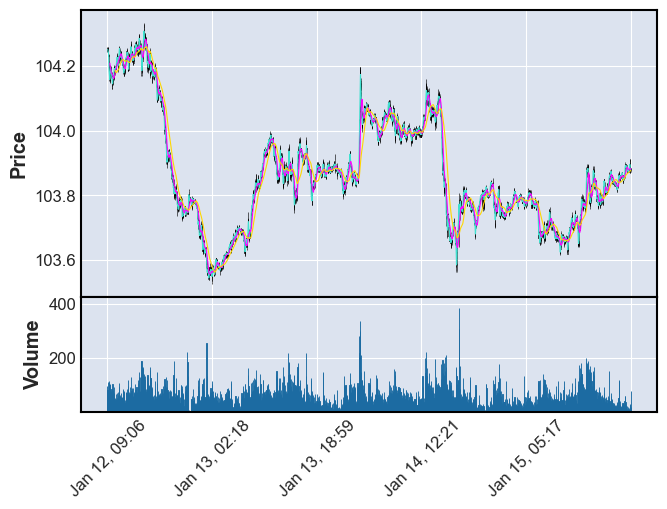

In [14]:
#mplfiianceの追加
import mplfinance as mpf
#DataFrameの時刻用の列をDateTimeインデックスに変換
df.set_index(pd.to_datetime(df['time']), inplace=True)
#要素の属性をfloat型に変換
new_df = df[['mid_o', 'mid_h', 'mid_l', 'mid_c', 'volume' ]].astype(float)
#列名を指定された名前に変更
new_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
print(new_df)
#チャートの表示
#mpf.plot(new_df,type='candle')
mpf.plot(new_df,type='candle', mav=(5,25,75), volume=True)